# Data Analysis and Visualization(Paper Plots)

In [7]:
!pip install pandas
!pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


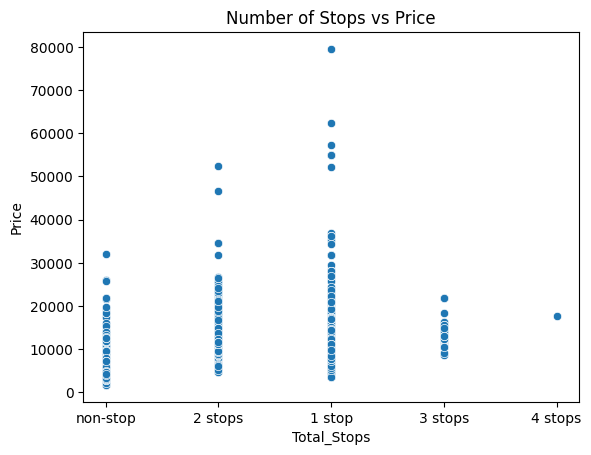

In [8]:
#Plot 1

df = pd.read_csv("Flight.csv")
df.info()
df.isnull().sum()  # Check missing values
df.dropna(inplace=True)  # Example treatment

sns.scatterplot(x='Total_Stops', y='Price', data=df)
plt.title("Number of Stops vs Price")
plt.show()

## Analysis of plot 1
The scatterplot visualizes the relationship between the number of stops on a flight and its price. By plotting 'Total_Stops' against 'Price', it helps to identify how flight prices vary with the number of layovers. Typically, this kind of plot can reveal whether flights with more stops tend to be cheaper or more expensive, highlighting any patterns or clusters in pricing relative to stop counts, which can be useful for understanding how stop frequency influences flight cost.

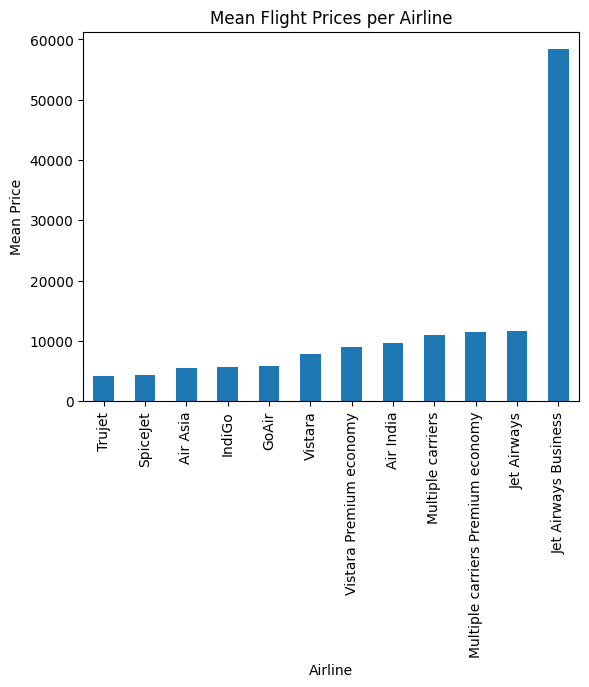

In [9]:
#Plot 2

airline_means = df.groupby('Airline')['Price'].mean().sort_values()
airline_means.plot(kind='bar')
plt.title("Mean Flight Prices per Airline")
plt.ylabel("Mean Price")
plt.xticks(rotation=90)
plt.show()

## Analysis of plot 2
The scatterplot visualizes the relationship between the number of stops on a flight and its price. By plotting 'Total_Stops' against 'Price', it helps to identify how flight prices vary with the number of layovers. Typically, this kind of plot can reveal whether flights with more stops tend to be cheaper or more expensive, highlighting any patterns or clusters in pricing relative to stop counts, which can be useful for understanding how stop frequency influences flight cost.

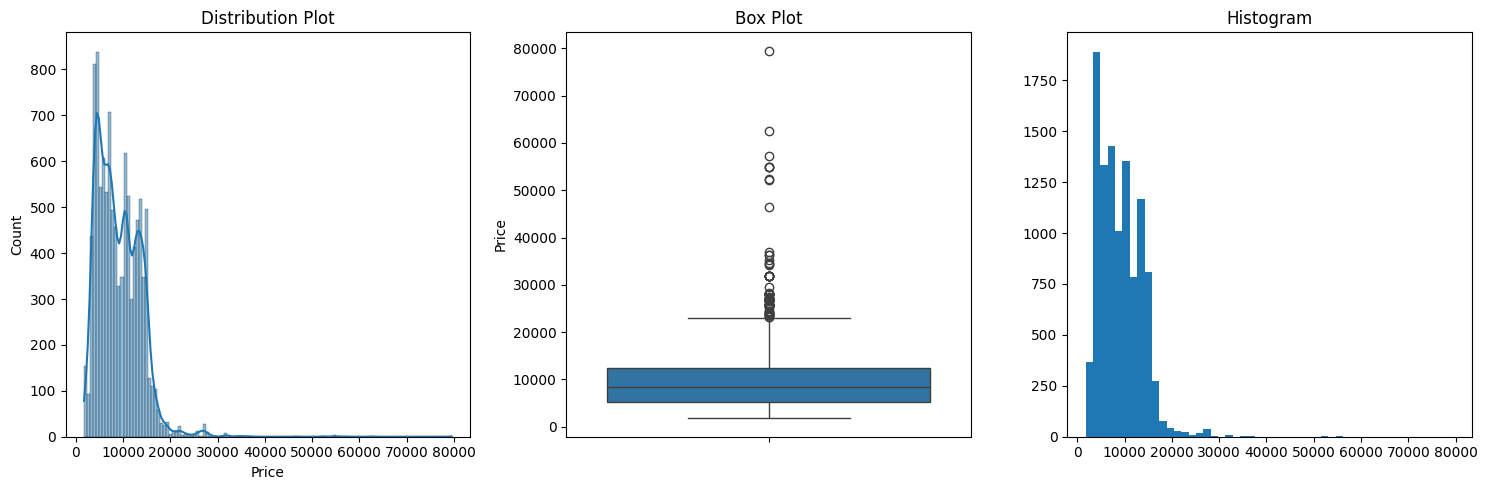

In [10]:
#Plot 3
def plot(df, col):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    sns.histplot(df[col], kde=True)
    plt.title("Distribution Plot")

    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[col])
    plt.title("Box Plot")

    plt.subplot(1, 3, 3)
    plt.hist(df[col], bins=50)
    plt.title("Histogram")
    plt.tight_layout()
    plt.show()


plot(df, 'Price')

## Analysis of plot 3
The combined plots provide a comprehensive view of the distribution of flight prices. The first plot, a histogram with a KDE curve, shows the overall shape and density of the price data, revealing common price ranges and the presence of any skewness. The box plot highlights the median, interquartile range, and potential outliers, giving insight into the spread and variability of prices. The simple histogram further reinforces the frequency distribution of prices across different bins. Together, these visualizations help understand the central tendency, variability, and outlier presence in flight pricing.

C:\Users\nageshbhagelli\AppData\Local\Temp\ipykernel_13784\3682047359.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])


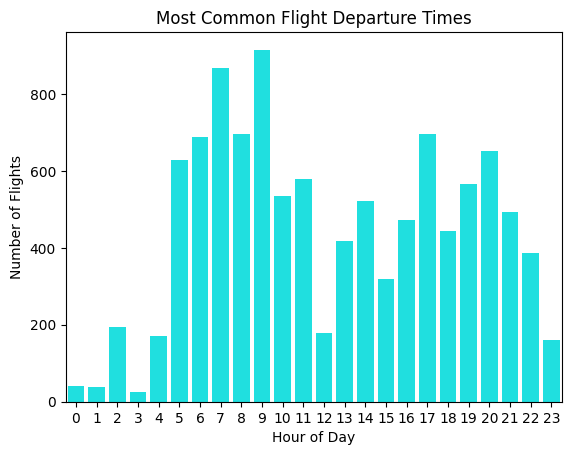

In [11]:
#Plot 4

df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Dep_hour'] = df['Dep_Time'].dt.hour
sns.countplot(x='Dep_hour', data=df, color="cyan")
plt.title("Most Common Flight Departure Times")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Flights")
plt.show()

## Analysis of plot 4
The count plot visualizes the distribution of flight departure times by hour of the day, showing which hours have the highest frequency of departures. This analysis helps identify peak times when most flights leave, revealing common patterns in airline scheduling and passenger demand throughout the day. The plot can highlight busy departure periods, such as morning or evening rush hours, and quieter times with fewer flights.

In [13]:
#Plot 5

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Replace extreme values
df['Price'] = df['Price'].apply(lambda x: df['Price'].median() if x > 35000 else x)

## Analysis of plot 5
This code identifies and addresses extreme outliers in the 'Price' data using the interquartile range (IQR) method. It calculates the lower and upper bounds for typical price values but focuses on replacing prices above a set high threshold (35,000) with the median price to reduce the impact of extreme high outliers. This treatment helps to minimize skewness and improve the robustness of subsequent analyses or models by capping unusually high prices without completely removing data points.

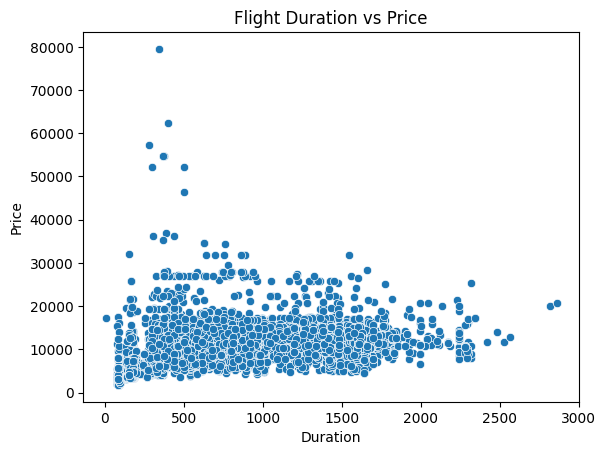

In [3]:
#Plot 6
df['Duration'] = df['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '').apply(lambda x: eval(x))
sns.scatterplot(x='Duration', y='Price', data=df)
plt.title("Flight Duration vs Price")
plt.show()


## Analysis of plot 6
This scatterplot examines the relationship between flight duration (converted to total minutes) and price, allowing us to see how the length of a flight influences its cost. By visualizing individual data points, it reveals patterns such as whether longer flights generally correspond to higher prices or if there are exceptions and variability. This analysis helps identify trends or clusters and can indicate if flight duration is a strong factor affecting pricing.

C:\Users\nageshbhagelli\AppData\Local\Temp\ipykernel_13784\1853627596.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Airline', y='Price', data=df, palette='Set3', width=0.4)  # Try 'Set2', 'Pastel1', etc.


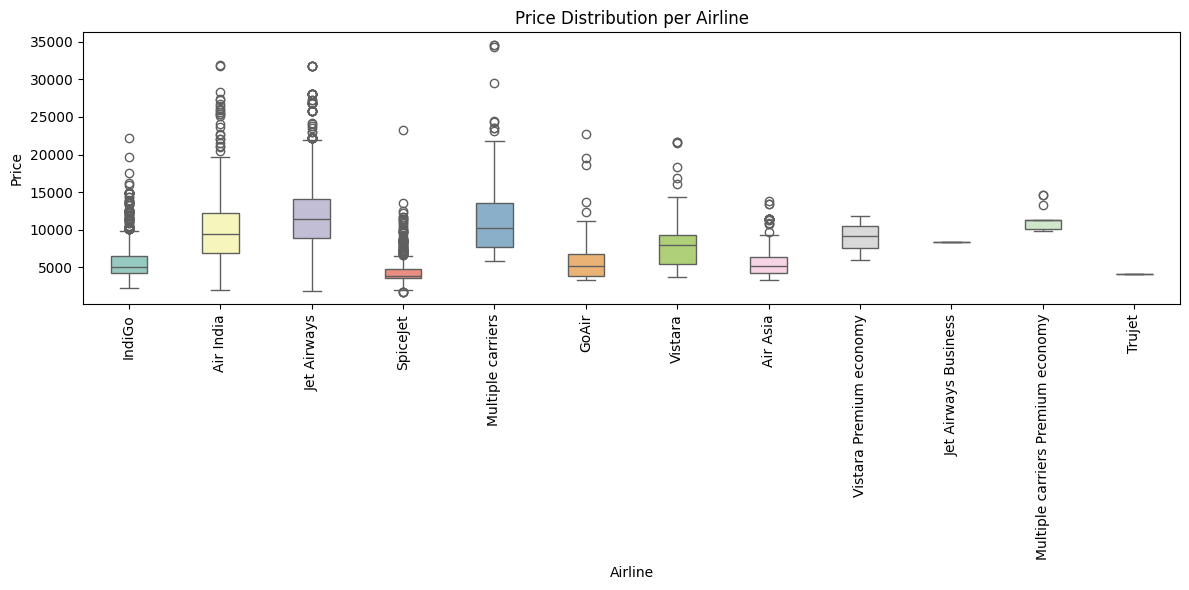

In [14]:
#highestprice.py


plt.figure(figsize=(12, 6))  # Optional: Make the plot wider

# Use a colorful palette
sns.boxplot(x='Airline', y='Price', data=df, palette='Set3', width=0.4)  # Try 'Set2', 'Pastel1', etc.

plt.xticks(rotation=90)
plt.title("Price Distribution per Airline")
plt.tight_layout()
plt.show()


## Analysis of plot 7
The boxplot visualizes the distribution of flight prices for each airline, highlighting differences in pricing patterns across carriers. It shows the median prices, variability, and potential outliers for each airline, allowing comparison of cost ranges and consistency in pricing. This analysis helps identify which airlines tend to offer cheaper or more expensive flights and reveals how price spreads differ, providing insights into competitive pricing strategies within the market.